In [27]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

In [17]:
data = pd.read_csv("data_2016.csv")

In [56]:
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


Drop rows where the person is self employed since we are primarily concerned with people in the tech workforce

In [60]:
data['Are you self-employed?'].value_counts()

0    1146
1     287
Name: Are you self-employed?, dtype: int64

In [61]:
data = data[data["Are you self-employed?"]==0]

Looking for columns that were not answered by a majority of the respondants.

In [62]:
drop_cols = []
for col in data.columns:
    if (sum(pd.isnull(data[col]))>len(data) / 2):
        drop_cols.append(col)
drop_cols

['Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you know local or online resources to seek help for a mental health disorder?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'Ha

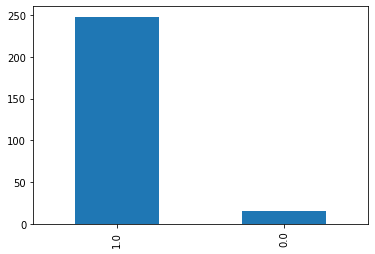

In [63]:
data[drop_cols[0]].value_counts().plot(kind='bar')

Some questions that aren't related to mental illness

In [64]:
useless_col = ["Are you self-employed?",
            "What US state or territory do you work in?",
           "What US state or territory do you live in?",
           "What country do you live in?",
           "Why or why not?",
           "Why or why not?.1"]
drop_cols.extend(useless_col)

In [65]:
drop_cols

['Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you know local or online resources to seek help for a mental health disorder?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'Ha

Drop useless columns

In [68]:
data2 = data.copy()
df3 = data2.drop(drop_cols, axis=1)

In [69]:
data2.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [70]:
data2.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [78]:
df4 = df3.copy()

###
rp_col = "How many employees does your company or organization have?"
# fill na
# df4[cdf4[rp_col]] = df4[cdf4[rp_col]].fillna(-1)
# replace labels with
rp_dt = {'1-5':1,
        '6-25':6,
        '26-100':26,
        '100-500':101,
        '500-1000':501,
        'More than 1000':1001}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
# rp_col = "Is your primary role within your company related to tech/IT?"
# df4[rp_col] = df4[rp_col].fillna(-1) #for NA

rp_col = "Does your employer provide mental health benefits as part of healthcare coverage?"
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        'Not eligible for coverage / N/A':-1
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you know the options for mental health care available under your employer-provided coverage?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'I am not sure':2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Does your employer offer resources to learn more about mental health concerns and options for seeking help?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {"Very easy":1, # positive/yes response to qn will be 1
        "Somewhat easy":2, # responses in increasing negativity will be 2 onwards
        "Neither easy nor difficult":3,
         "I don't know":3,
         "Somewhat difficult":4,
         "Very difficult":5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a mental health disorder with your employer would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a physical health issue with your employer would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you feel comfortable discussing a mental health disorder with your coworkers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you feel that your employer takes mental health as seriously as physical health?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'No':2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you have previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {0:2 # replace 0 (no) with 2 for consistency
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have your previous employers provided mental health benefits?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'No, none did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Were you aware of the options for mental health care provided by your previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, I was aware of all of them':1, # positive/yes response to qn will be 1
        'I was aware of some':2, # responses in increasing negativity will be 2 onwards,
        'No, I only became aware later':3,
         'N/A (not currently aware)':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did your previous employers provide resources to learn more about mental health issues and how to seek help?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, always':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'No':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a mental health disorder with previous employers would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None of them':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a physical health issue with previous employers would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
         'None of them':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you have been willing to discuss a mental health issue with your previous co-workers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, at all of my previous employers':1, # positive/yes response to qn will be 1
        'Some of my previous employers':2, # responses in increasing negativity will be 2 onwards,
         'No, at none of my previous employers':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, at all of my previous employers':1, # positive/yes response to qn will be 1
        'Some of my previous employers':2, # responses in increasing negativity will be 2 onwards,
         "I don't know":3,
         'No, at none of my previous employers':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did you feel that your previous employers took mental health as seriously as physical health?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
         'None of them':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you be willing to bring up a physical health issue with a potential employer in an interview?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you bring up a mental health issue with a potential employer in an interview?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you feel that being identified as a person with a mental health issue would hurt your career?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, it has':1, # positive/yes response to qn will be 1
        'Yes, I think it would':2, # responses in increasing negativity will be 2 onwards,
        'Maybe':3,
         "No, I don't think it would":4,
         'No, it has not':5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they do':1, # positive/yes response to qn will be 1
         'Yes, I think they would':2, # responses in increasing negativity will be 2 onwards,
        'Maybe':3,
         "No, I don't think they would":4,
         'No, they do not':5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "How willing would you be to share with friends and family that you have a mental illness?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Very open':1, # positive/yes response to qn will be 1
         'Somewhat open':2, # responses in increasing negativity will be 2 onwards,
        'Neutral':3,
         'Somewhat not open':4,
         'Not open at all':5,
         'Not applicable to me (I do not have a mental illness)':-1
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, I experienced':1, # positive/yes response to qn will be 1
         'Yes, I observed':2, # responses in increasing negativity will be 2 onwards,
        'Maybe/Not sure':3,
         'No':4,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
# rp_col = "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
# # nan values is 55.41%; unsure what is the cause of nan values
# # drop column
# df4 = df4.drop([rp_col],axis=1)

###
rp_col = "Do you have a family history of mental illness?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you had a mental health disorder in the past?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you currently have a mental health disorder?"
# potential target column or key X column
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you been diagnosed with a mental health condition by a medical professional?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'No':2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you ever sought treatment for a mental health issue from a mental health professional?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {1:1, # positive/yes response to qn will be 1
        0:2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Often':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Often':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you work remotely?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Always':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Never':3,
       }

df4[rp_col] = df4[rp_col].replace(rp_dt)

#####
df4.describe(include='all')

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,...,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1143,1146,1146,1146.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61,44,180,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,United States of America,Back-end Developer,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,505,716,238,NaN
mean,288.216405,0.770506,1.505236,1.692845,2.508726,2.205934,1.794066,2.750436,2.189354,2.694590,...,1.991274,1.505236,1.426702,1.177138,0.681501,33.655323,NaN,NaN,NaN,2.088133
std,401.014511,0.420691,1.028192,1.236236,0.807396,0.823985,0.557129,1.240026,0.734615,0.532856,...,0.882589,0.500191,0.494814,1.878176,1.311271,11.703277,NaN,NaN,NaN,0.677846
min,1.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,3.000000,NaN,NaN,NaN,1.000000
25%,26.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,28.000000,NaN,NaN,NaN,2.000000
50%,101.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,32.000000,NaN,NaN,NaN,2.000000
75%,501.000000,1.000000,2.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,2.000000,3.000000,2.000000,38.000000,NaN,NaN,NaN,3.000000


In [79]:
df4['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()

 1    531
 2    319
 3    213
-1     83
Name: Does your employer provide mental health benefits as part of healthcare coverage?, dtype: int64

In [85]:
df4['What is your gender?']

0                        Male
1                        male
2                       Male 
4                      Female
5                        Male
6                           M
7                      female
8                      Female
10                       Male
11                       Male
12                     Female
13                       Male
14                       Male
15                          m
16      I identify as female.
17                       Male
19                          M
20                       Male
21                       male
22                       male
23                       Male
25                       male
26                       Male
27                       male
28                     female
29                   Bigender
30                 non-binary
31                       Male
32                       Male
34                       Male
                ...          
1398                     Male
1399                     Male
1400      